# Linear Regression with Diabetes Dataset 2
Trying linear regression again from scratch using sklearn. <br>
This model predicts the disease progression after a year given the average blood pressure, in the first part it is the sugar level.

In [33]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# import the data
from sklearn import datasets
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


<b>Explanation</b><br>
I realized I did not need to drop I just need to access the only column I need.

In [35]:
# define x and y, I want my x to be the bp
X = np.array(df['bp'])
y = np.array(df['target'])

In [36]:
# split the data to 80, 20
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 42, test_size = 0.2)

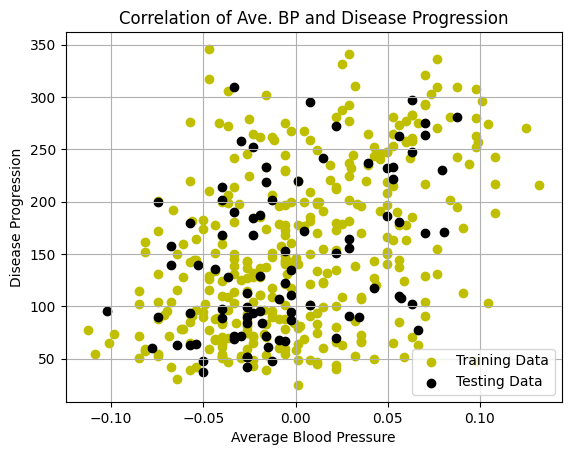

In [37]:
plt.scatter(XTrain, yTrain, color = 'y', label = "Training Data")
plt.scatter(XTest, yTest, color = 'black', label = "Testing Data")
plt.title("Correlation of Ave. BP and Disease Progression")
plt.xlabel("Average Blood Pressure")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()
plt.show()

In [38]:
# create and train the model
model = LinearRegression()
model.fit(XTrain.reshape(-1, 1), yTrain)

LinearRegression()

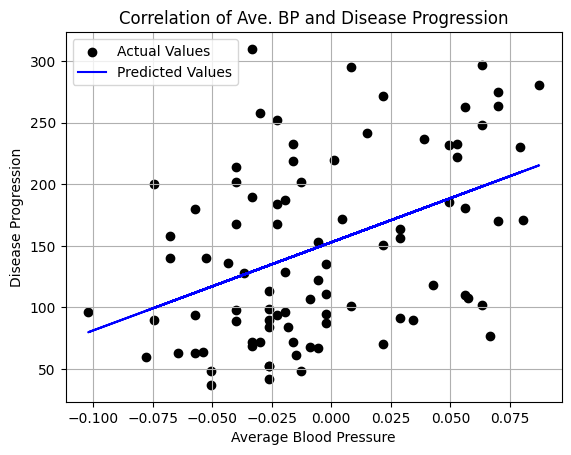

In [39]:
predictedVal = model.predict(XTest.reshape(-1, 1))
plt.scatter(XTest, yTest, color = 'black', label = 'Actual Values')
plt.plot(XTest, predictedVal, color = 'blue', label = "Predicted Values")
plt.legend()
plt.grid()
plt.title("Correlation of Ave. BP and Disease Progression")
plt.xlabel("Average Blood Pressure")
plt.ylabel("Disease Progression")
plt.show()

In [40]:
# predicting a new value
newDP = model.predict([[0.035]])
print(newDP)

[177.96328115]


In [41]:
# error analysis
from sklearn.metrics import r2_score
print(r2_score(yTest, predictedVal))

0.1734118396354255


It is a bad regression